### 1. 回归模型
做一个回归模型的分析

In [309]:
# coding: utf-8
import lightgbm as lgb
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load or create your dataset
df_train = pd.read_csv('regression/regression.train', header=None, sep='\t')
df_test = pd.read_csv('regression/regression.test', header=None, sep='\t')

In [3]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1,0.644,0.247,-0.447,0.862,0.374,0.854,-1.126,-0.790,2.173,...,-0.190,-0.744,3.102,0.958,1.061,0.980,0.875,0.581,0.905,0.796
1,0,0.385,1.800,1.037,1.044,0.349,1.502,-0.966,1.734,0.000,...,-0.440,0.638,3.102,0.695,0.909,0.981,0.803,0.813,1.149,1.116
2,0,1.214,-0.166,0.004,0.505,1.434,0.628,-1.174,-1.230,1.087,...,-1.383,1.355,0.000,0.848,0.911,1.043,0.931,1.058,0.744,0.696
3,1,0.420,1.111,0.137,1.516,-1.657,0.854,0.623,1.605,1.087,...,0.731,1.424,3.102,1.597,1.282,1.105,0.730,0.148,1.231,1.234
4,0,0.897,-1.703,-1.306,1.022,-0.729,0.836,0.859,-0.333,2.173,...,-2.019,-0.289,0.000,0.805,0.930,0.984,1.430,2.198,1.934,1.684


In [4]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1,0.869,-0.635,0.226,0.327,-0.690,0.754,-0.249,-1.092,0.000,...,-0.010,-0.046,3.102,1.354,0.980,0.978,0.920,0.722,0.989,0.877
1,1,0.908,0.329,0.359,1.498,-0.313,1.096,-0.558,-1.588,2.173,...,-1.139,-0.001,0.000,0.302,0.833,0.986,0.978,0.780,0.992,0.798
2,1,0.799,1.471,-1.636,0.454,0.426,1.105,1.282,1.382,0.000,...,1.129,0.900,0.000,0.910,1.108,0.986,0.951,0.803,0.866,0.780
3,0,1.344,-0.877,0.936,1.992,0.882,1.786,-1.647,-0.942,0.000,...,-0.678,-1.360,0.000,0.947,1.029,0.999,0.728,0.869,1.027,0.958
4,1,1.105,0.321,1.522,0.883,-1.205,0.681,-1.070,-0.922,0.000,...,-0.374,0.113,0.000,0.756,1.361,0.987,0.838,1.133,0.872,0.808


F:\app\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


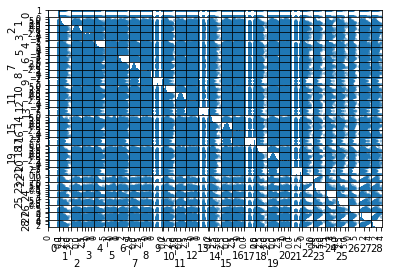

In [5]:
pd.scatter_matrix(df_train)
plt.show()

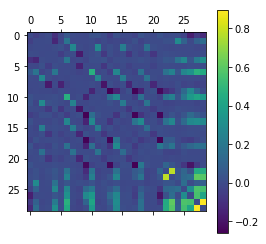

In [8]:
cor=df_train.corr()
cor[cor==1.0]=0.0
plt.matshow(cor)
plt.colorbar()
plt.show()

0


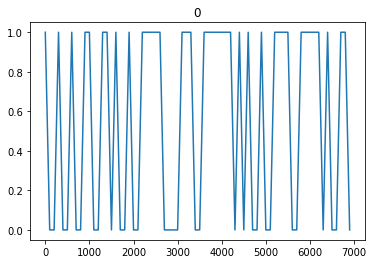

1


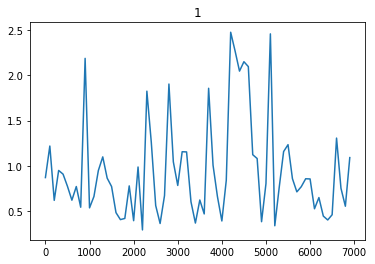

2


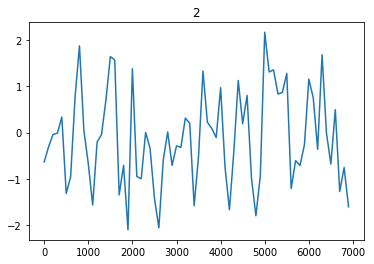

3


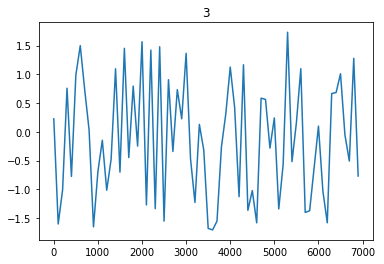

4


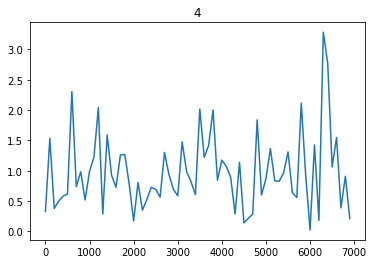

5


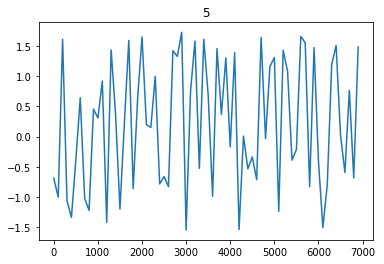

6


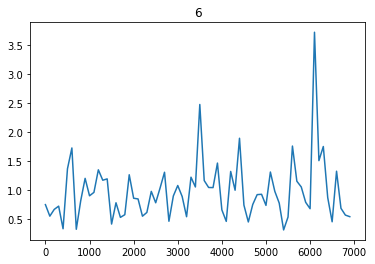

7


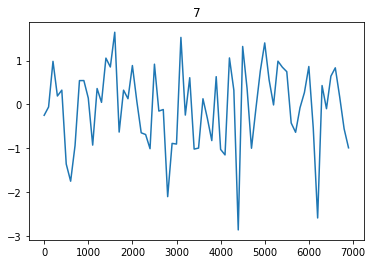

8


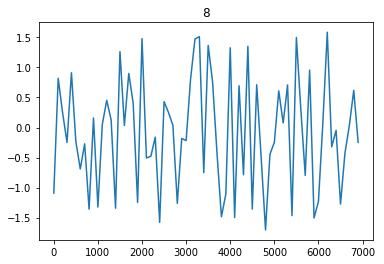

9


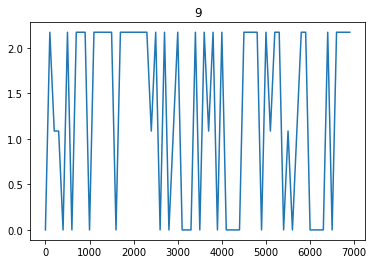

10


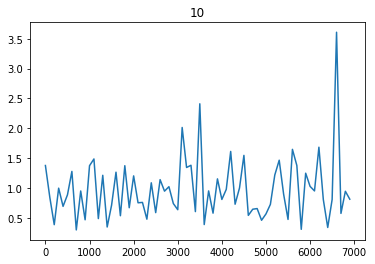

11


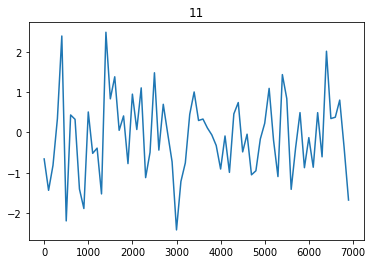

12


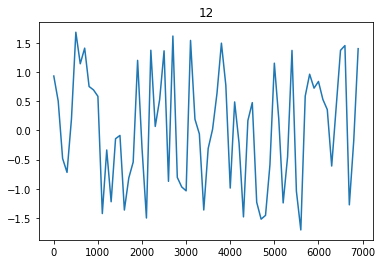

13


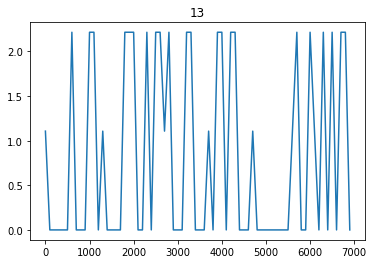

14


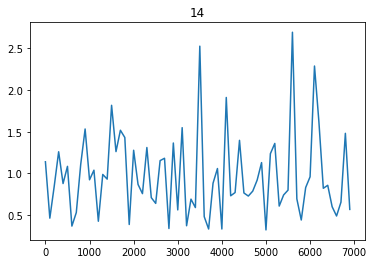

15


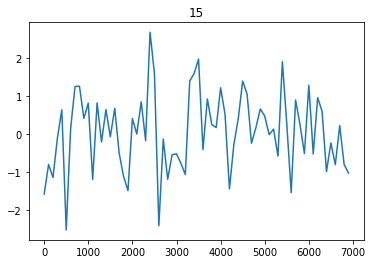

16


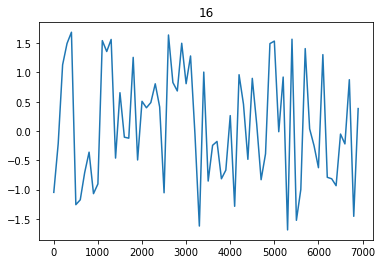

17


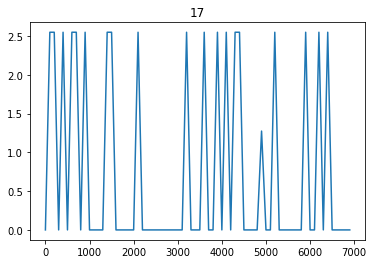

18


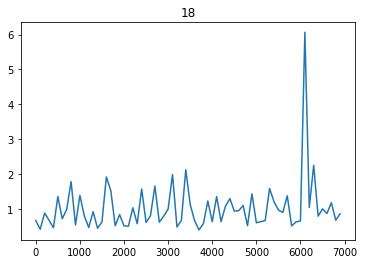

19


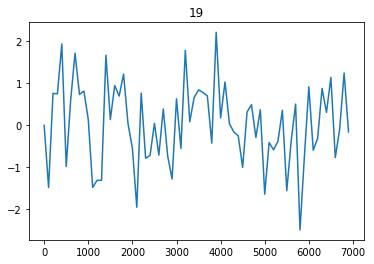

20


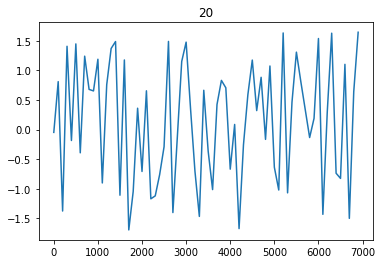

21


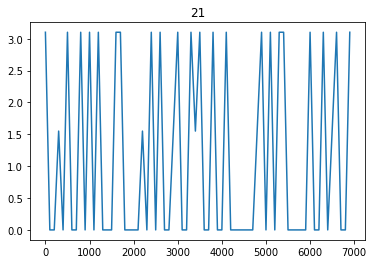

22


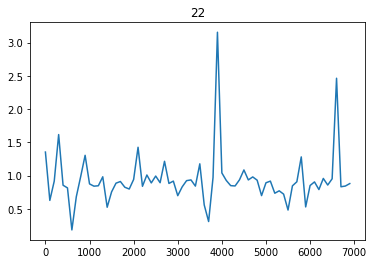

23


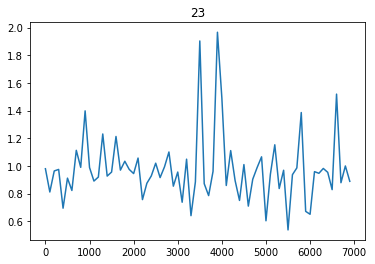

24


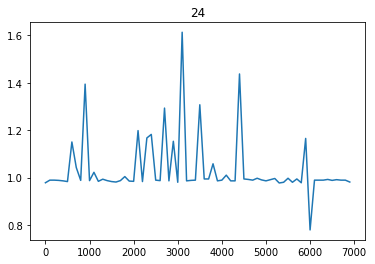

25


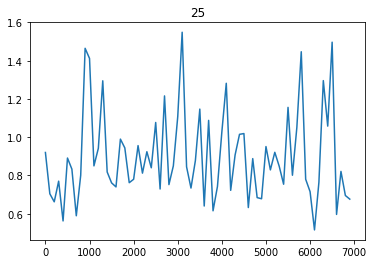

26


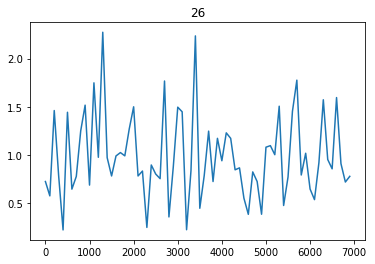

27


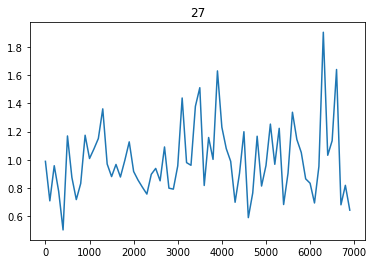

28


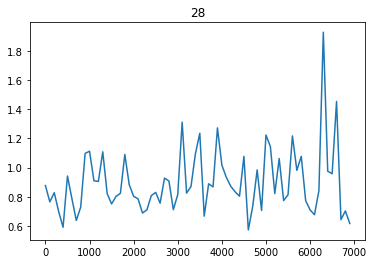

In [13]:
for i in df_train:
    print(i)
    plt.plot(df_train[i][::100])
    plt.title(i)
    plt.show()
    

#### 提取其中的训练集和测试集数据和label

In [14]:
y_train = df_train[0].values
y_test = df_test[0].values
X_train = df_train.drop(0, axis=1).values
X_test = df_test.drop(0, axis=1).values

### 预测的图形

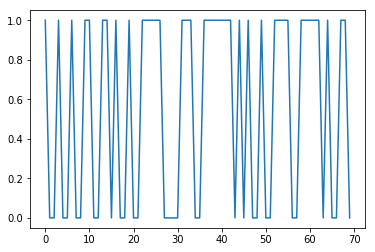

In [17]:
plt.plot(y_train[::100])
plt.show()

## 产生数据集

In [23]:
train=lgb.Dataset(X_train,y_train,free_raw_data=False)

In [26]:
test=lgb.Dataset(X_test,y_test,reference=train,free_raw_data=False)

In [34]:
#train.save_binary('trian.pkl')

In [35]:
#test.save_binary('test.pkl')

## 用train训练

train(params, train_set, num_boost_round=100, valid_sets=None, valid_names=None, fobj=None, feval=None, init_model=None, feature_name='auto', categorical_feature='auto', early_stopping_rounds=None, evals_result=None, verbose_eval=True, learning_rates=None, keep_training_booster=False, callbacks=None)

In [100]:
params={
    'task':'train',
    'boosting':'gbdt',
    'learning_rate':0.2,#
    'num_leaves':31,#
    'min_data_in_leaf':20,#
    'bagging_fraction':0.5,#
    'bagging_freq':10,#
    'objective':'binary',#
    'metric':['poisson','auc'],#
    'metric_freq':5,#not work 
    'verson':1,
    'num_boost_round':10,
    'early_stopping_rounds':100,
    'feature_fraction':0.5,
    
    
}

In [101]:
gbm=lgb.train(params,train,valid_sets=test,)

[1]	valid_0's poisson: 0.86263	valid_0's auc: 0.717468
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's poisson: 0.853304	valid_0's auc: 0.739599
[3]	valid_0's poisson: 0.847054	valid_0's auc: 0.746082
[4]	valid_0's poisson: 0.842633	valid_0's auc: 0.754604
[5]	valid_0's poisson: 0.836989	valid_0's auc: 0.762303
[6]	valid_0's poisson: 0.834825	valid_0's auc: 0.765625
[7]	valid_0's poisson: 0.832161	valid_0's auc: 0.768713
[8]	valid_0's poisson: 0.827636	valid_0's auc: 0.777396
[9]	valid_0's poisson: 0.824462	valid_0's auc: 0.78183
[10]	valid_0's poisson: 0.821646	valid_0's auc: 0.783814
Did not meet early stopping. Best iteration is:
[10]	valid_0's poisson: 0.821646	valid_0's auc: 0.783814


F:\app\anaconda\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
F:\app\anaconda\lib\site-packages\lightgbm\engine.py:104: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


## 初次预测

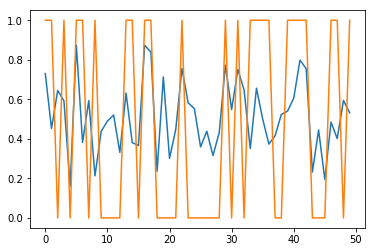

In [102]:
plt.plot(gbm.predict(X_test)[::10])
plt.plot(y_test[::10])
plt.show()

In [104]:
gbm.best_score

defaultdict(dict,
            {'valid_0': {'auc': 0.7838138544891641,
              'poisson': 0.8216463040500973}})

### 保存模型

In [114]:
# save model to file,只保存了最好的那个预测结果
gbm.save_model('model0.txt')

### load 

In [111]:
# load model to predict
print('Load model to predict')
bst = lgb.Booster(model_file='model0.txt')
# can only predict with the best iteration (or the saving iteration)
y_pred = bst.predict(X_test)
# eval with loaded model

Load model to predict


In [117]:
import pickle
# dump model with pickle，可以保存所有的结果
with open('model.pkl', 'wb') as fout:
    pickle.dump(gbm, fout)
# load model with pickle to predict
with open('model.pkl', 'rb') as fin:
    '''保存了所有的结果，可以用任何结果进行预测'''
    pkl_bst = pickle.load(fin)

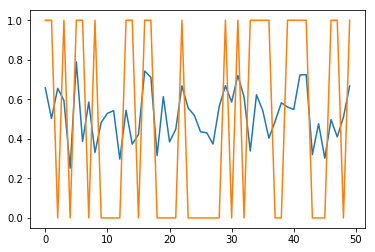

In [124]:
plt.plot(pkl_bst.predict(test.data,num_iteration=5)[::10])
plt.plot(y_test[::10])
plt.show()

### continue train
    如果没有验证集，就不会输出结果，也不会有最好的分数了。但是仍然可以预测

In [151]:
gbmC=lgb.train(params,train,init_model='model0.txt',num_boost_round=10,valid_sets=test)

[11]	valid_0's poisson: 0.81774	valid_0's auc: 0.791199
[12]	valid_0's poisson: 0.815633	valid_0's auc: 0.793666
[13]	valid_0's poisson: 0.814952	valid_0's auc: 0.791554
[14]	valid_0's poisson: 0.81444	valid_0's auc: 0.792634
[15]	valid_0's poisson: 0.8122	valid_0's auc: 0.79752
[16]	valid_0's poisson: 0.812769	valid_0's auc: 0.795214
[17]	valid_0's poisson: 0.811733	valid_0's auc: 0.795408
[18]	valid_0's poisson: 0.811776	valid_0's auc: 0.793505
[19]	valid_0's poisson: 0.809668	valid_0's auc: 0.796488
[20]	valid_0's poisson: 0.808418	valid_0's auc: 0.798165


F:\app\anaconda\lib\site-packages\lightgbm\basic.py:729: UserWarning: The prediction of init_model will be overrided by init_score.
  warnings.warn("The prediction of init_model will be overrided by init_score.")


In [163]:
gbmC.save_model('model-10-20.txt')

In [154]:
gbmC.predict(test.data).shape

(500,)

In [155]:
gbmC.best_score

defaultdict(dict,
            {'valid_0': {'auc': 0.7981649896800825,
              'poisson': 0.8084184464965365}})

## 画评估图形

In [164]:
eval_dict={}
gbmC=lgb.train(params,train,init_model='model-10-20.txt',num_boost_round=10,valid_sets=test,evals_result=eval_dict)

[31]	valid_0's poisson: 0.81774	valid_0's auc: 0.791199
[32]	valid_0's poisson: 0.815633	valid_0's auc: 0.793666
[33]	valid_0's poisson: 0.814952	valid_0's auc: 0.791554
[34]	valid_0's poisson: 0.81444	valid_0's auc: 0.792634
[35]	valid_0's poisson: 0.8122	valid_0's auc: 0.79752
[36]	valid_0's poisson: 0.812769	valid_0's auc: 0.795214
[37]	valid_0's poisson: 0.811733	valid_0's auc: 0.795408
[38]	valid_0's poisson: 0.811776	valid_0's auc: 0.793505
[39]	valid_0's poisson: 0.809668	valid_0's auc: 0.796488
[40]	valid_0's poisson: 0.808418	valid_0's auc: 0.798165


F:\app\anaconda\lib\site-packages\lightgbm\basic.py:729: UserWarning: The prediction of init_model will be overrided by init_score.
  warnings.warn("The prediction of init_model will be overrided by init_score.")


Plot metrics during training...


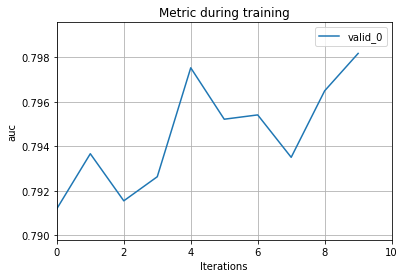

Plot feature importances...


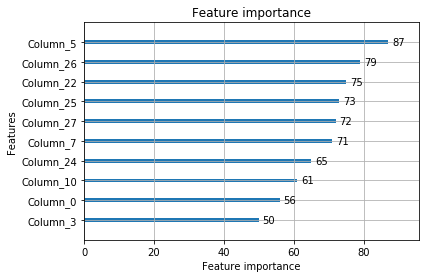

Plot 19th tree spit gain...


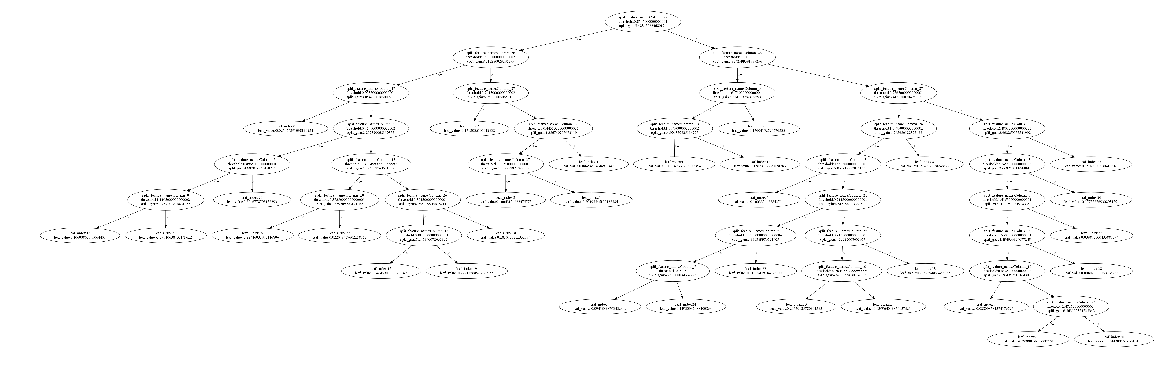

Plot 19th tree with graphviz...


'Tree19.gv.pdf'

In [169]:

print('Plot metrics during training...')
ax = lgb.plot_metric(eval_dict, metric='auc')
plt.show()

print('Plot feature importances...')
ax = lgb.plot_importance(gbmC, max_num_features=10)
plt.show()

print('Plot 19th tree spit gain...')  # one tree use categorical feature to split
ax = lgb.plot_tree(gbmC, tree_index=18, figsize=(20, 8), show_info=['split_gain'])
plt.show()

print('Plot 19th tree with graphviz...')
graph = lgb.create_tree_digraph(gbmC, tree_index=18, name='Tree19')
graph.render(view=True)

# gridsearchcv 

In [261]:
params

{'bagging_fraction': 0.5,
 'bagging_freq': 10,
 'boosting': 'gbdt',
 'feature_fraction': 0.5,
 'learning_rate': 0.2,
 'metric': ['poisson', 'auc'],
 'metric_freq': 5,
 'min_data_in_leaf': 20,
 'num_leaves': 31,
 'objective': 'binary',
 'task': 'train',
 'verbose': 1,
 'verson': 1}

In [262]:
param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [20, 40],}
fit_param={
    'objective':'binary',
    'metric':'auc',
    'early_stopping_rounds':100,}

In [263]:
from sklearn.model_selection import ParameterGrid
f=ParameterGrid(param_grid)
len(f)

4

In [264]:
best_score=0
best_model=None

In [270]:
for num,i in enumerate(f):
    i.update(fit_param)
    gbi=lgb.train(i,train,num_boost_round=10,valid_sets=test)
    gbi.save_model('best_model.txt')
    best_=gbi.best_score['valid_0']['auc']
    if best_>best_score:
        best_model=gbi

F:\app\anaconda\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
F:\app\anaconda\lib\site-packages\lightgbm\engine.py:104: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.784507
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.784878
[3]	valid_0's auc: 0.785265
[4]	valid_0's auc: 0.785394
[5]	valid_0's auc: 0.785588
[6]	valid_0's auc: 0.7862
[7]	valid_0's auc: 0.785975
[8]	valid_0's auc: 0.786184
[9]	valid_0's auc: 0.786555
[10]	valid_0's auc: 0.786749
[11]	valid_0's auc: 0.786732
[12]	valid_0's auc: 0.786926
[13]	valid_0's auc: 0.787361
[14]	valid_0's auc: 0.78749
[15]	valid_0's auc: 0.787684
[16]	valid_0's auc: 0.787958
[17]	valid_0's auc: 0.7887
[18]	valid_0's auc: 0.788942
[19]	valid_0's auc: 0.789393
[20]	valid_0's auc: 0.789941
Did not meet early stopping. Best iteration is:
[20]	valid_0's auc: 0.789941
[1]	valid_0's auc: 0.784507
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.784878
[3]	valid_0's auc: 0.785265
[4]	valid_0's auc: 0.785394
[5]	valid_0's auc: 0.785588
[6]	valid_0's auc: 0.7862
[7]	valid_0's auc: 0.785975
[8]	valid_0's auc: 0.786184
[9]	valid

In [267]:
best_model.best_score

defaultdict(dict, {'valid_0': {'auc': 0.8262383900928792}})

In [272]:
best_model.feature_importance()

array([64, 38, 23, 68, 34, 69, 38, 25, 10, 58, 54, 34,  5, 39, 30, 22,  8,
       43, 35, 28,  4, 57, 67, 27, 74, 99, 71, 76])

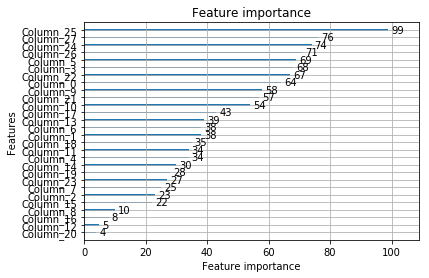

In [280]:
lgb.plot_importance(best_model)
plt.show()

### 只用重要的10个特征试一下

In [332]:
fi=best_model.feature_importance()

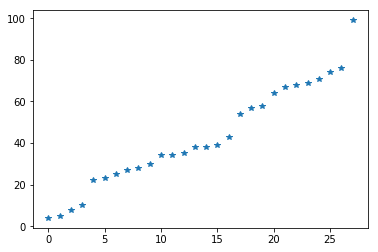

In [335]:
plt.plot(np.sort(fi),'*')
plt.show()

In [351]:
train_fi=lgb.Dataset(train.data[:,fi>=np.sort(fi)[-10]],train.label)
test_fi=lgb.Dataset(test.data[:,fi>=np.sort(fi)[-10]],test.label)

In [353]:
lgb.train(params,train_fi,valid_sets=test_fi,early_stopping_rounds=10)

[1]	valid_0's poisson: 0.866424	valid_0's auc: 0.681937
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's poisson: 0.856007	valid_0's auc: 0.736512
[3]	valid_0's poisson: 0.848219	valid_0's auc: 0.767915
[4]	valid_0's poisson: 0.840416	valid_0's auc: 0.773953
[5]	valid_0's poisson: 0.837666	valid_0's auc: 0.77251
[6]	valid_0's poisson: 0.833139	valid_0's auc: 0.778839
[7]	valid_0's poisson: 0.829342	valid_0's auc: 0.785797
[8]	valid_0's poisson: 0.825932	valid_0's auc: 0.786112
[9]	valid_0's poisson: 0.823463	valid_0's auc: 0.787377
[10]	valid_0's poisson: 0.820271	valid_0's auc: 0.793973
[11]	valid_0's poisson: 0.818834	valid_0's auc: 0.79436
[12]	valid_0's poisson: 0.815996	valid_0's auc: 0.799826
[13]	valid_0's poisson: 0.815163	valid_0's auc: 0.79781
[14]	valid_0's poisson: 0.813234	valid_0's auc: 0.798794
[15]	valid_0's poisson: 0.811784	valid_0's auc: 0.804099
[16]	valid_0's poisson: 0.809036	valid_0's auc: 0.808082
[17]	valid_0's poisson: 0.809219	valid

In [323]:
(np.argsort(fi)>fi-10).sum()

7

### 降维

In [283]:
svd=TruncatedSVD(2)

In [285]:
train_svd=svd.fit_transform(train.data)
test_svd=svd.transform(test.data)

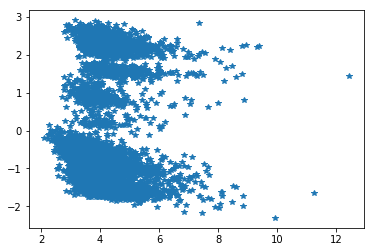

In [288]:
plt.plot(train_svd[:,0],train_svd[:,1],'*')
plt.show()

In [290]:
train2=lgb.Dataset(train_svd,train.label)
test2=lgb.Dataset(test_svd,test.label)

In [293]:
params

{'bagging_fraction': 0.5,
 'bagging_freq': 10,
 'boosting': 'gbdt',
 'feature_fraction': 0.5,
 'learning_rate': 0.2,
 'metric': ['poisson', 'auc'],
 'metric_freq': 5,
 'min_data_in_leaf': 20,
 'num_leaves': 31,
 'objective': 'binary',
 'task': 'train',
 'verbose': 1,
 'verson': 1}

In [294]:
tree=lgb.train(params,train2,early_stopping_rounds=10,valid_sets=test2)

[1]	valid_0's poisson: 0.876748	valid_0's auc: 0.51469
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's poisson: 0.876634	valid_0's auc: 0.509473
[3]	valid_0's poisson: 0.876855	valid_0's auc: 0.512021
[4]	valid_0's poisson: 0.876937	valid_0's auc: 0.515843
[5]	valid_0's poisson: 0.877558	valid_0's auc: 0.508788
[6]	valid_0's poisson: 0.878345	valid_0's auc: 0.505023
[7]	valid_0's poisson: 0.878527	valid_0's auc: 0.509804
[8]	valid_0's poisson: 0.8789	valid_0's auc: 0.511562
[9]	valid_0's poisson: 0.879635	valid_0's auc: 0.509772
[10]	valid_0's poisson: 0.88032	valid_0's auc: 0.50878
[11]	valid_0's poisson: 0.880586	valid_0's auc: 0.508635
[12]	valid_0's poisson: 0.880737	valid_0's auc: 0.514553
Early stopping, best iteration is:
[2]	valid_0's poisson: 0.876634	valid_0's auc: 0.509473


In [295]:
tree.best_score

defaultdict(dict,
            {'valid_0': {'auc': 0.5094733617131063,
              'poisson': 0.8766340391828026}})

In [297]:
tree.feature_importance()

array([30, 30])

# 自定义方法

In [ ]:
# self-defined eval metric
# f(preds: array, train_data: Dataset) -> name: string, value: array, is_higher_better: bool
# binary error
def binary_error(preds, train_data):
    labels = train_data.get_label()
    return 'error', np.mean(labels != (preds > 0.5)), False


gbm = lgb.train(params,
                lgb_train,
                num_boost_round=10,
                init_model=gbm,
                fobj=loglikelood,
                feval=binary_error,
                valid_sets=lgb_eval)

print('Finish 40 - 50 rounds with self-defined objective function and eval metric...')

print('Start a new training job...')


# callback
def reset_metrics():
    def callback(env):
        lgb_eval_new = lgb.Dataset(X_test, y_test, reference=lgb_train)
        if env.iteration - env.begin_iteration == 5:
            print('Add a new valid dataset at iteration 5...')
            env.model.add_valid(lgb_eval_new, 'new valid')
    callback.before_iteration = True
    callback.order = 0
    return callback


gbm = lgb.train(params,
                lgb_train,
                num_boost_round=10,
                valid_sets=lgb_train,
                callbacks=[reset_metrics()])

print('Finish first 10 rounds with callback function...')